In [11]:
# import the necessary packages

import os
import json
import time
import folium
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Gather the Data


Columns :
Nombre de bornes disponibles : nbfreeedock (int)  
Nombre vélo en PARK+ : nbbikeoverflow (int)  
Nombres de bornes en station : nbedock (int)  
PARK + activation : overflowactivation (str)  
etc ...  

voir Modèle de données sur https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/information/


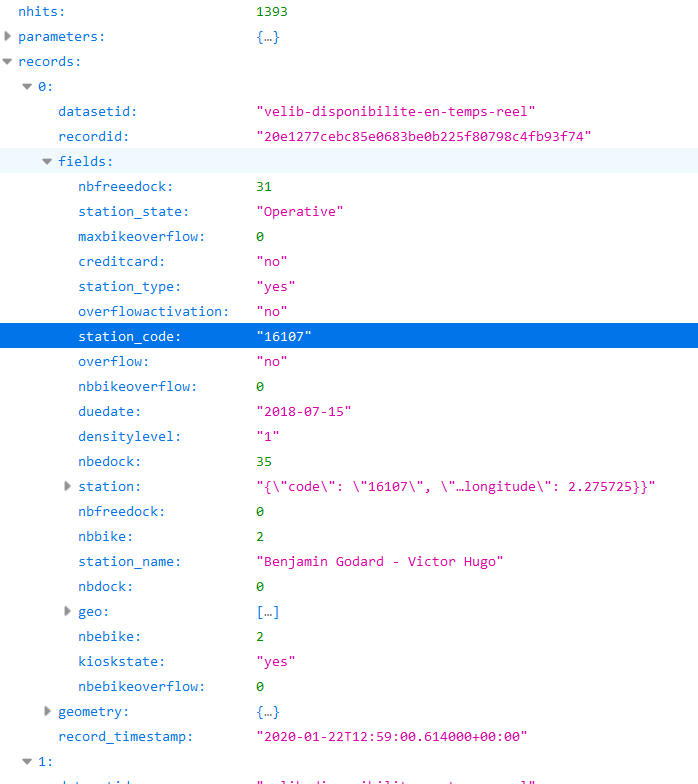

In [2]:
from IPython.display import Image
Image(filename='datajson.png')

In [4]:
%%time

# set the endpoint API URL
url = "https://opendata.paris.fr/api/records/1.0/search/?dataset=velib-disponibilite-en-temps-reel&lang=fr&rows=-1"

# make the call
resp = requests.get(url)

#grab the results returned in json format
data = resp.json()

# Track request_time for comparison with record_timestamp
request_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())


col = ['nbfreeedock',
 'station_state',
 'maxbikeoverflow',
 'creditcard',
 'station_type',
 'overflowactivation',
 'station_code',
 'overflow',
 'nbbikeoverflow',
 'duedate',
 'densitylevel',
 'nbedock',
 'station',
 'nbfreedock',
 'nbbike',
 'station_name',
 'nbdock',
 'geo',
 'nbebike',
 'kioskstate',
 'nbebikeoverflow',
 'request_time',
 'record_timestamp',
 'recordid']

# Initialize the dataframe 
df = pd.DataFrame(columns=col)

nb_stations = data['nhits']
print("[INFO] Numbers of stations :", nb_stations)

# loop over the stations
for i in range(nb_stations):

    # Add all the values from the fields key and 3 other relevants informations
    df.loc[len(df)] = list(data['records'][i]['fields'].values()) + [request_time, data['records'][i]['record_timestamp'], data['records'][i]['recordid']]
    

# Not very optimize, maybe there is a better index and a better way to do it
df.set_index('recordid', inplace=True)

print("[INFO] Done.")

[INFO] Numbers of stations : 1394
Wall time: 18.5 s


In [5]:
df

nbfreeedock     station_state  \
recordid                                                                 
a51a20e73f0ba776bb7d29649007be286b66dca7          34         Operative   
58244c402f325307ada71156b2192adc30eabb5a          45         Operative   
74c886105e3c99d64eadc4853623a88e96c11ec0          21         Operative   
5d6309610292936d5534f54fb5feb978f2864d5d          24         Operative   
c63ecff1aa9a90cb651d481c046b51f5b751f161           2         Operative   
b715a1dcd4c90fc866cf34f33590111e987f007a          56         Operative   
6b1a57d38e1daa04d5581ff7cc825f0cf3150698           0         Operative   
63947b33c8b15eae75f9840d5f704b8ce0d7c474          34         Operative   
214710ba3ecd29932c038322890e45876dc271f2          51         Operative   
9ac0b6f8097552b5ebd1899e5c0d8bd7c072eb2b          18         Operative   
b218e9542bf55a5d41a1dccdef364e233cae0542          22         Operative   
8d4ebe21e72d60533dcc1a55a44a10fc53607f2d          13         Operative   
787e970f3958e01b185d644e194501f98b7face8          46         Operative   
19f7ff3b02e6eda7120bd992bc2b1d4c6d2380f4          22         Operative   
597b015c17e5b1a125a1f0ee2720360e7be5b201          14         Operative   
7daa349a8a2731c4f8a2df9ea011a478ca2e178b          29         Operative   
3ed0e477fe9cac0a8954e17652d3ac03503a1a4f          24         Operative   
f696f628724b9be4adc5a7450d12ac73470c6f5e          48         Operative   
e6b97d8acd72ba9e1fd12301be6dd056d84ce0a2          25             Close   
998d6fc7fb85f4e30683d4c27eaaa3d21e959984          18         Operative   
4c5082ad32a285c3f68fd1caee1861b1b901942e           7         Operative   
aadbd9d3f45b37ed27806c0b6e1dfb117a7b82d5          16         Operative   
d6d03d6f28fa937371838b6ed026b08cb4d8c6af          23         Operative   
ae8f9b19e3ffa5f6226ec85c8d4b83e6403f66c9          54         Operative   
9cbbaaae07eb65228e8d72094351265c947558b0          20         Operative   
8694d8a38867d2d6796866bc14e44cbb7fbb13cf          46         Operative   
39124f24b09035d4c3d403898541dadaf33be6a3          37             Close   
54c4ec81a7b37242b4c4aa87f7fb783ec6e0b2f9          11         Operative   
5a3fce65b400c2133f5171ededc550e1b164d27f          17         Operative   
112ff9d17dca2cd3de00b80e03aa55704472c0d3           6         Operative   
1e1f3a483c9b92556107631fdd2739ba13a5c374          52         Operative   
2e074fb818dce68dee3b670339dde63926ed1ab4          64         Operative   
264554d85631ca22672c9470b4a5854a8d122061           0         Operative   
96fae0e58d490323548df47e80f3fe129657c43f          32         Operative   
06e6f08616786da0d509125bfe2a6cf2f316d833          42         Operative   
7c384b223ea4861e2e47bf9a1a6aeab95335f885          20         Operative   
caed3a5f6475a7566a1ddf7ebda9d6a83950437e          36         Operative   
06202d6d64119239f6ce336d1a1be2261e78421c          14         Operative   
cda93fe314ee35cbb96b1fd459c88107cd691d46          36         Operative   
95a87b025dfa273e80794da3d70097bf14f992bc          16         Operative   
3c0b4f4bb71cee0c1e2d0d257e427dc0c9cd0423          11         Operative   
dff9f9c84b4ba3300ef8be7c5e940949861e9407          28         Operative   
26dbbe4b5317ffb764d535a25a0ac7fe8793944c           0         Operative   
543340132399392f943a629c79e78dae0c285a7d           0         Operative   
a3c8166eda1db1a5ac7863bf20ff2299de862303          25         Operative   
584f8a35f6c594f6c9bdd4446e1247beda71e3e6          22         Operative   
2ac6cf0aa4d40aa942665c569edcb9660ca1956d          25         Operative   
4d1a2ba418f1a029eeecd56058c2a3ebc55c44a1          16         Operative   
ff8e8cdaf532c17e5172db0ed19565b0515ea9fb          19         Operative   
29087ff7716444bc091d568fe1104be8216a5db3          15         Operative   
efcc5cde4bdaf4b11b3e7f258340fd17e2bbee66          14         Operative   
b496d35b52866118b5ee1dc457d951ee8119dae2          24         Operative   
ee13bdfafeecd6666683f4740467a9df1becb638     

In [6]:
print('The data has {} Rows and {} columns'.format(df.shape[0],df.shape[1]))

The data has 1394 Rows and 23 columns


In [7]:
print("The types of columns are:")
df.dtypes

The types of columns are:


nbfreeedock           object
station_state         object
maxbikeoverflow       object
creditcard            object
station_type          object
overflowactivation    object
station_code          object
overflow              object
nbbikeoverflow        object
duedate               object
densitylevel          object
nbedock               object
station               object
nbfreedock            object
nbbike                object
station_name          object
nbdock                object
geo                   object
nbebike               object
kioskstate            object
nbebikeoverflow       object
request_time          object
record_timestamp      object
dtype: object

In [8]:
# converting datatypes 
df = df.infer_objects()
df['record_timestamp'] = pd.to_datetime(df['record_timestamp'], infer_datetime_format=True)
df['request_time'] = pd.to_datetime(df['request_time'], format="%Y-%m-%d %H:%M:%S")
df.dtypes

nbfreeedock                         int64
station_state                      object
maxbikeoverflow                     int64
creditcard                         object
station_type                       object
overflowactivation                 object
station_code                       object
overflow                           object
nbbikeoverflow                      int64
duedate                            object
densitylevel                       object
nbedock                             int64
station                            object
nbfreedock                          int64
nbbike                              int64
station_name                       object
nbdock                              int64
geo                                object
nbebike                             int64
kioskstate                         object
nbebikeoverflow                     int64
request_time               datetime64[ns]
record_timestamp      datetime64[ns, UTC]
dtype: object

### Extract Descriptive Statistics of Each Column

In [12]:
def num_missing(x):
    return len(x.index)-x.count()

def num_unique(x):
    return len(np.unique(x))

temp_df = df.describe().T
missing_df = pd.DataFrame(df.apply(num_missing, axis=0)) 
missing_df.columns = ['missing']
unq_df = pd.DataFrame(df.apply(num_unique, axis=0))
unq_df.columns = ['unique']
types_df = pd.DataFrame(df.dtypes)
types_df.columns = ['DataType']

In [13]:
# Print the descriptive statistics of numerical columns
summary_df = temp_df.join(missing_df).join(unq_df).join(types_df)
summary_df

count       mean        std  min   25%   50%   75%   max  \
nbfreeedock      1394.0  20.622669  14.436422  0.0  11.0  20.0  30.0  67.0   
maxbikeoverflow  1394.0  16.177188  18.322689  0.0   0.0  10.0  30.0  71.0   
nbbikeoverflow   1394.0   0.037303   0.365470  0.0   0.0   0.0   0.0  12.0   
nbedock          1394.0  25.547346  15.817729  0.0  18.0  25.0  35.0  73.0   
nbfreedock       1394.0   4.406743  10.669020  0.0   0.0   0.0   0.0  58.0   
nbbike           1394.0   3.095409   4.466218  0.0   0.0   2.0   4.0  43.0   
nbdock           1394.0   5.477044  12.887936  0.0   0.0   0.0   0.0  70.0   
nbebike          1394.0   2.512912   2.698045  0.0   1.0   2.0   3.0  18.0   
nbebikeoverflow  1394.0   0.007174   0.092536  0.0   0.0   0.0   0.0   2.0   

                 missing  unique DataType  
nbfreeedock            0      66    int64  
maxbikeoverflow        0      63    int64  
nbbikeoverflow         0       4    int64  
nbedock                0      70    int64  
nbfreedock             0      55    int64  
nbbike                 0      29    int64  
nbdock                 0      57    int64  
nbebike                0      18    int64  
nbebikeoverflow        0       3    int64

In [14]:
# Print the descriptive statistics of categorical columns

cat_index = ['station_state', 'creditcard', 'station_type', 'overflowactivation', 'station_code', 'overflow', 'densitylevel', 'station_name', 'kioskstate']

summary_df_cat = missing_df.join(unq_df).join(types_df.loc[cat_index], how='inner') #Only summarize categorical columns
summary_df_cat

missing  unique DataType
station_state             0       3   object
creditcard                0       2   object
station_type              0       2   object
overflowactivation        0       1   object
station_code              0    1394   object
overflow                  0       2   object
densitylevel              0       2   object
station_name              0    1389   object
kioskstate                0       2   object

In [15]:
# pandas profiling is an amazing tool 
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="report_velib.html")

In [17]:
# uncomment if you are in a web notebook
# profile

### EDA
Thanks to pandas profiling, we can see that there is 1327 station operative, 41 work in progress and 26 close.

In [18]:
velib_op = df[df['station_state']=='Operative']

# Available bikes

In [19]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green").hex,10))
def red(brightness):
    brightness = int(round(9 * brightness)) # convert from 0.0-1.0 to 0-255
    return colors[brightness]

In [21]:
velib_op['lat'] = velib_op['geo'].apply(lambda x: float(x[0]))
velib_op['long'] = velib_op['geo'].apply(lambda x: float(x[1]))
velib_op['color'] = velib_op.apply(lambda x: red((x['nbbike']+x['nbebike'])/(x['nbedock'] + x['nbdock'])).hex, axis=1)

In [48]:
velib_op['dock_velib'] = velib_op.apply(lambda x: x['nbedock'] + x['nbdock'], axis=1)
velib_op['available_velib'] = velib_op.apply(lambda x: x['nbbike'] + x['nbebike'], axis=1)
velib_op['available_dock'] = velib_op.apply(lambda x: x['dock_velib'] - x['available_velib'], axis=1)

velib_op['ratio'] = velib_op.apply(lambda x: (x['nbbike']+x['nbebike'])/(x['nbedock'] + x['nbdock']), axis=1)

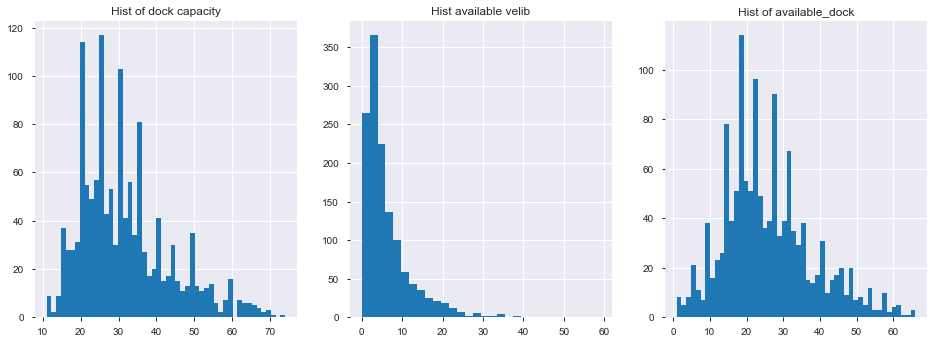

In [50]:
#graph distribution
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.hist(velib_op['dock_velib'], bins=50)
plt.title('Hist of dock capacity')

plt.subplot(232)
plt.hist(velib_op['available_velib'], bins=30)
plt.title('Hist available velib')

plt.subplot(233)
plt.hist(velib_op['available_dock'], bins=50)
plt.title('Hist of available_dock')

plt.show()

In [72]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster



callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker", markerColor: "red"});
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;
};
"""

m = folium.Map([48.85, 2.35], tiles='Cartodb Positron', zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

FastMarkerCluster(
    velib_op['geo'],
    callback=callback
).add_to(m)

m

In [74]:

m = folium.Map(
    location=[48.85, 2.35],
    tiles='Cartodb Positron',
    zoom_start=11
)

marker_cluster = MarkerCluster(
    name='1000 clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)

for k, v in velib_op.iterrows():
    location = v.geo[0], v.geo[1]
    marker = folium.Marker(location=location)
    popup = 'Station:{}<br>Number of Velibs:{}<br>Number of Docks:{}'.format(v.station_name, v.available_velib, v.available_dock)
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(m)

m

In [68]:
from folium.plugins import HeatMap

m = folium.Map([48.85, 2.35], tiles='Cartodb Positron', zoom_start=11)

HeatMap(
    velib_op[['lat','long', 'available_velib']].values
).add_to(m)

cm.LinearColormap(
    ['blue', 'green',  'yellow', 'orange', 'red'],
    index=np.linspace(0, 1, 5)
).scale(0, 350).add_to(m)

m